./Protocol/subject102.dat
./Protocol/subject103.dat
./Protocol/subject104.dat
./Protocol/subject105.dat
./Protocol/subject106.dat
./Protocol/subject107.dat
./Protocol/subject108.dat
./Protocol/subject109.dat


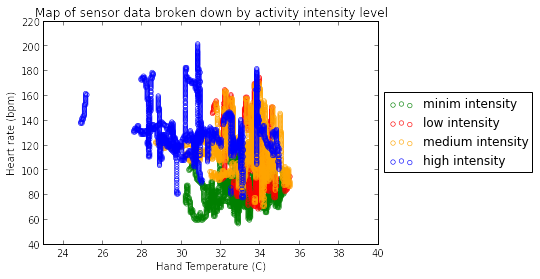

model accuracy (%):  64.8075024679 %


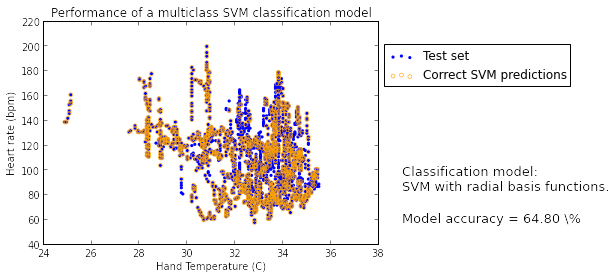

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.cross_validation import train_test_split

list_file = ['./Protocol/subject101.dat',\
             './Protocol/subject102.dat',\
             './Protocol/subject103.dat',\
             './Protocol/subject104.dat',\
             './Protocol/subject105.dat',\
             './Protocol/subject106.dat',\
             './Protocol/subject107.dat',\
             './Protocol/subject108.dat',\
             './Protocol/subject109.dat']

features = [1,2,3]

df = pd.read_table(list_file[0],header=None,delim_whitespace=True)
df_analysis=df[features].dropna()

for ifile in list_file[1:]:
    print ifile
    df = pd.read_table(ifile,header=None,delim_whitespace=True)
    df_analysis = pd.concat([df_analysis,df[features].dropna()])
    

data_labels = ['activity', 'heart rate', 'hand temp']
df_analysis.columns = data_labels
df_analysis = df_analysis[df_analysis.activity != 0]
df_analysis.drop_duplicates(inplace=True)
    
#df_analysis.info()
#####################################################################

target_labels = ['minimum','low','medium','high']
conversion_dict = {'minimum':[1,2,3,9,10,11,18],
                   'low': [17,13,19],
                   'medium': [4,12,16],
                   'high':[5,6,7,20,24]}


for tl in target_labels:
    l = conversion_dict[tl]
    df_analysis.activity.replace(to_replace=l,value=tl,inplace=True)
    
#df_analysis.info()

ax = df_analysis[df_analysis.activity == 'minimum'].plot(
    kind='scatter',
    x='hand temp',y='heart rate',
    xlim = (23,40),
    edgecolor='g', marker = 'o', linewidth = 0.6, 
    facecolors='none', label='minim intensity')

df_analysis[df_analysis.activity == 'low'].plot(
    kind='scatter',
    x='hand temp',y='heart rate',
    xlim = (23,40),
    edgecolor='r', marker = 'o', linewidth = 0.6, 
    facecolors='none',label='low intensity', ax=ax)

df_analysis[df_analysis.activity == 'medium'].plot(
    kind='scatter',
    x='hand temp',y='heart rate',
    xlim = (23,40),
    edgecolor='orange', marker = 'o', linewidth = 0.6, 
    facecolors='none',label='medium intensity', ax=ax)

df_analysis[df_analysis.activity == 'high'].plot(
    kind='scatter',
    x='hand temp',y='heart rate',
    xlim = (23,40),
    edgecolor='b', marker = 'o', linewidth = 0.6, 
    facecolors='none', label='high intensity', ax=ax)

plt.title('Map of sensor data broken down by activity intensity level', color='black')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Hand Temperature (C)')
plt.ylabel('Heart rate (bpm)')
plt.savefig('plot1.jpg',dpi=300,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


#####################################################################

set_labels = df_analysis.activity
labels =list(set(set_labels))

train_labels = np.array([labels.index(x) for x in set_labels])
train_features = df_analysis.iloc[:,1:]
train_features = np.array(train_features)

my_kernel = 'rbf'
classifier = svm.SVC(kernel=my_kernel)
X =train_features
y = train_labels

X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=73562)

classifier.fit(X_train, y_train)

results = classifier.predict(X_test)
result_select = (results == y_test)


y_correct = y_test[result_select]
X_correct = X_test[result_select,:]
num_correct = (results == y_test).sum()

recall = float(num_correct) / float(len(y_test))

print "model accuracy (%): ", recall * float(100), "%"

#########################################################################
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('Performance of a multiclass SVM classification model')

ax1.set_xlabel('Hand Temperature (C)')
ax1.set_ylabel('Heart rate (bpm)')

ax1.scatter(X_test[:,1],X_test[:,0],linewidth = 0, s=6, label='SVM Test set')
ax1.scatter(X_correct[:,1],X_correct[:,0],linewidth = 0.6, facecolors='none',\
            edgecolor='orange', s=15,label='Correct SVM predictions')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))

txt = plt.text(39,50,'\nClassification model:\nSVM with radial basis functions.\n\nModel accuracy = 64.80 \%', fontsize = 13)
plt.savefig('plot2.jpg',dpi=300,bbox_extra_artists=(lgd,txt), bbox_inches='tight')
plt.show()

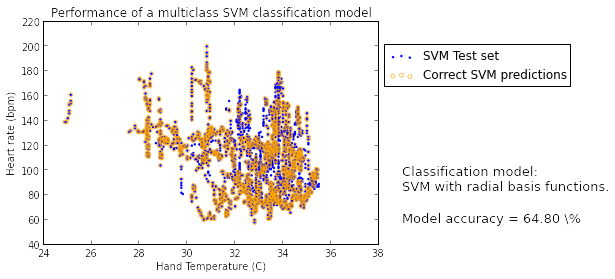

In [50]:
#########################################################################
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('Performance of a multiclass SVM classification model')

ax1.set_xlabel('Hand Temperature (C)')
ax1.set_ylabel('Heart rate (bpm)')

ax1.scatter(X_test[:,1],X_test[:,0],linewidth = 0, s=6, label='SVM Test set')
ax1.scatter(X_correct[:,1],X_correct[:,0],linewidth = 0.6, facecolors='none',\
            edgecolor='orange', s=15,label='Correct SVM predictions')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))

txt = plt.text(39,50,'\nClassification model:\nSVM with radial basis functions.\n\nModel accuracy = 64.80 \%', fontsize = 13)
plt.savefig('plot2.jpg',dpi=300,bbox_extra_artists=(lgd,txt), bbox_inches='tight')
plt.show()